# **Title of Project: Bank Customer Churn Model**

# Objective:


# 1.   Data **Encoding**
# 2.   Feature **Scaling**
# **3**.   Handling Imbalance Data
     
# **     a. Random Under Sampling**
     
# **     b. Random Over Sampling**
# 4.   Support Vector Machine **Classifier**
# 5.   Grid Search for Hyperparameter **Tunning**



# **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# **Data Source**

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated('CustomerId').sum()

0

In [ ]:
df = df.set_index('CustomerId')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.replace({'Geography':{'France':2, 'Germany':1, 'Spain':0}}, inplace=True)

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df.replace({'Gender':{'Male':0, 'Female':1}}, inplace=True)

In [ ]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
df.replace({'NumOfProducts':{1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [ ]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [ ]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [ ]:
df.loc[(df['Balance']==0), 'Exited'].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

In [ ]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: >

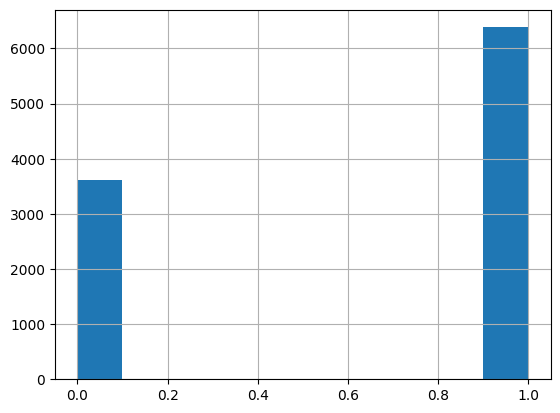

In [ ]:
df['Zero Balance'].hist()

In [ ]:
df.groupby(['Exited', 'Geography']).count()

RowNumber  Surname  CreditScore  Gender   Age  Tenure  \
Exited Geography                                                          
0      0               2064     2064         2064    2064  2064    2064   
       1               1695     1695         1695    1695  1695    1695   
       2               4204     4204         4204    4204  4204    4204   
1      0                413      413          413     413   413     413   
       1                814      814          814     814   814     814   
       2                810      810          810     810   810     810   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Exited Geography                                                      
0      0             2064           2064       2064            2064   
       1             1695           1695       1695            1695   
       2             4204           4204       4204            4204   
1      0              413            413        413             413   
       1              814            814        814             814   
       2              810            810        810             810   

                  EstimatedSalary  Zero Balance  
Exited Geography                                 
0      0                     2064          2064  
       1                     1695          1695  
       2                     4204          4204  
1      0                      413           413  
       1                      814           814  
       2                      810           810

In [ ]:
df.columns

Index(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Zero Balance'],
      dtype='object')

In [ ]:
X = df.drop(['Surname', 'Exited'], axis = 1)

In [ ]:
Y = df['Exited']

In [ ]:
X.shape, Y.shape

((10000, 12), (10000,))

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

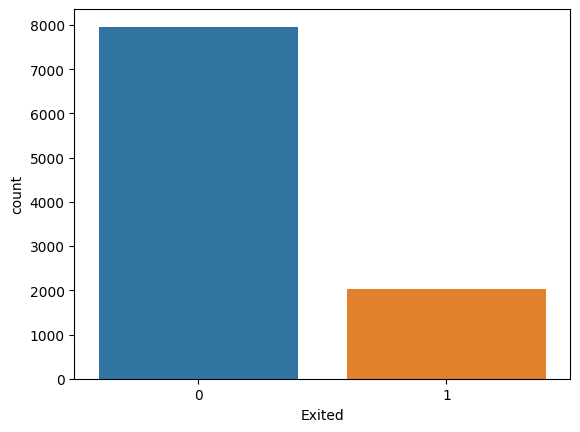

In [ ]:
sns.countplot(x='Exited', data=df)

In [ ]:
X.shape, Y.shape

((10000, 12), (10000,))

# **Random Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from numpy.random.mtrand import rand
rus = RandomUnderSampler(random_state=2529)

In [ ]:
X_rus, Y_rus = rus.fit_resample(X, Y)

In [ ]:
X_rus.shape, Y_rus.shape, X.shape, Y.shape

((4074, 12), (4074,), (10000, 12), (10000,))

In [ ]:
Y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
Y_rus.value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

<Axes: ylabel='Frequency'>

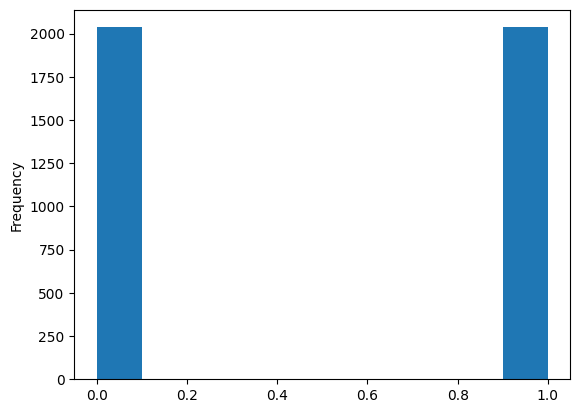

In [ ]:
Y_rus.plot(kind = 'hist')

# **Random Over Sampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=2529)

In [ ]:
X_ros, Y_ros = ros.fit_resample(X, Y)

In [ ]:
X_ros.shape, Y_ros.shape, X.shape, Y.shape

((15926, 12), (15926,), (10000, 12), (10000,))

In [ ]:
Y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
Y_ros.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

<Axes: ylabel='Frequency'>

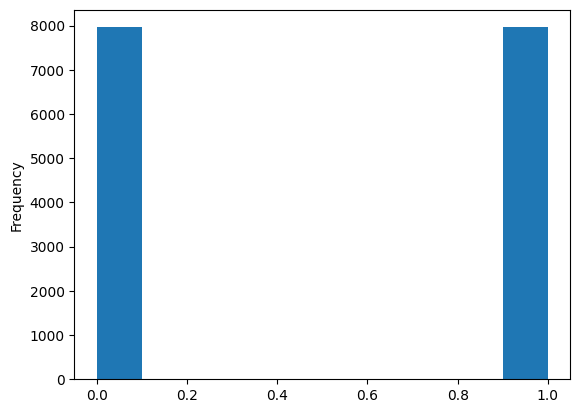

In [ ]:
Y_ros.plot(kind = 'hist')

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# **Split Original Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=25)

# **Split Random Under Sample Data**

In [ ]:
X_train_rus, X_test_rus, Y_train_rus, Y_test_rus = train_test_split(X_rus, Y_rus, test_size=0.3, random_state=25)

# **Split Random Over Sample Data**

In [ ]:
X_train_ros, X_test_ros, Y_train_ros, Y_test_ros = train_test_split(X_ros, Y_ros, test_size = 0.3, random_state=25)

# **Standerdize Features**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

# **Standardize Original Data**

In [ ]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

In [ ]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

# **Standardize Random Under Sample Data**

In [ ]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

In [ ]:
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

# **Standardize Random Over Sample**

In [ ]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

In [ ]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']])

# **Support Vector Machine Classifier**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train, Y_train)

SVC()

In [ ]:
Y_pred = svc.predict(X_test)

# **Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[2419,    0],
       [ 581,    0]])

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.1, 1, 10],
              'gamma':[1, 0.1, 0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(X_train,Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
confusion_matrix(Y_test, grid_predictions)

array([[2419,    0],
       [ 581,    0]])

In [ ]:
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2419
           1       0.00      0.00      0.00       581

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Model with Random Under Sampling**

In [ ]:
svc_rus = SVC()

In [ ]:
svc_rus.fit(X_train_rus, Y_train_rus)

SVC()

In [ ]:
Y_pred_rus = svc_rus.predict(X_test_rus)

# **Model Accuracy**

In [ ]:
confusion_matrix(Y_test_rus, Y_pred_rus)

array([[383, 220],
       [376, 244]])

In [ ]:
print(classification_report(Y_test_rus, Y_pred_rus))

              precision    recall  f1-score   support

           0       0.50      0.64      0.56       603
           1       0.53      0.39      0.45       620

    accuracy                           0.51      1223
   macro avg       0.52      0.51      0.51      1223
weighted avg       0.52      0.51      0.51      1223



# **Hyperparameter Tunning**

In [ ]:
param_grid = {'C':[0.1, 1, 10],
              'gamma':[1, 0.1, 0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [ ]:
grid_rus = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_rus.fit(X_train_rus,Y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [ ]:
confusion_matrix(Y_test_rus, grid_predictions_rus)

array([[599,   4],
       [614,   6]])

In [ ]:
print(classification_report(Y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.49      0.99      0.66       603
           1       0.60      0.01      0.02       620

    accuracy                           0.49      1223
   macro avg       0.55      0.50      0.34      1223
weighted avg       0.55      0.49      0.33      1223



# **Model with Random Over SAmpling**

In [ ]:
svc_ros = SVC()
svc_ros.fit(X_train_ros, Y_train_ros)
Y_pred_ros = svc_ros.predict(X_test_ros)


# **Model Accuracy**

In [ ]:
confusion_matrix(Y_test_ros, Y_pred_ros)
print(classification_report(Y_test_ros, Y_pred_ros))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54      2426
           1       0.50      0.44      0.47      2352

    accuracy                           0.51      4778
   macro avg       0.51      0.51      0.51      4778
weighted avg       0.51      0.51      0.51      4778



# **Hyperparameter Tunning**

In [ ]:
param_grid = {'C':[0.1, 1, 10],
              'gamma':[1, 0.1, 0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [ ]:
grid_ros = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid_ros.fit(X_train_ros,Y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   7.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   8.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   9.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   6.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   7.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [ ]:
confusion_matrix(Y_test_ros, grid_predictions_ros)

array([[2426,    0],
       [ 151, 2201]])

In [ ]:
print(classification_report(Y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2426
           1       1.00      0.94      0.97      2352

    accuracy                           0.97      4778
   macro avg       0.97      0.97      0.97      4778
weighted avg       0.97      0.97      0.97      4778

